<a href="https://colab.research.google.com/github/krvicky/Portfolio_mean/blob/main/Portfolio_mean_and_Correlation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance numpy


In [ ]:
import yfinance as yf
import numpy as np

def get_stock_data(stock_symbols, start_date, end_date):
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    return data['Adj Close']

def calculate_covariance_matrix(stock_symbols, start_date, end_date):
    stock_data = get_stock_data(stock_symbols, start_date, end_date)
    return stock_data.cov()

# Example usage
stock_symbols = ['^GSPC']  # Replace with the symbols you want to analyze
start_date = '2023-01-01'
end_date = '2023-09-11'

data = get_stock_data(stock_symbols, start_date, end_date)
print("Covariance Matrix:")
data.tail(5)


[*********************100%%**********************]  1 of 1 completed
Covariance Matrix:


Date
2023-09-01    4515.770020
2023-09-05    4496.830078
2023-09-06    4465.479980
2023-09-07    4451.140137
2023-09-08    4457.490234
Name: Adj Close, dtype: float64

In [ ]:
import yfinance as yf
import numpy as np

def get_stock_data(stock_symbols, start_date, end_date):
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    return data['Adj Close']

def calculate_correlation_matrix(stock_symbols, start_date, end_date):
    stock_data = get_stock_data(stock_symbols, start_date, end_date)
    return stock_data.corr()



In [ ]:
# Example usage
stock_symbols = ['AAPL','FB', 'C', 'DIS']  # Replace with the symbols you want to analyze
start_date = '2020-01-01'
end_date = '2021-12-31'

corr_matrix = calculate_correlation_matrix(stock_symbols, start_date, end_date)
corr_matrix_rounded = corr_matrix.round(2)  # Round to 2 decimal places
print("Correlation Matrix (Rounded to 2 decimal places):")
print(corr_matrix_rounded)

[*********************100%%**********************]  4 of 4 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



Correlation Matrix (Rounded to 2 decimal places):
      AAPL     C   DIS  FB
AAPL  1.00  0.49  0.73 NaN
C     0.49  1.00  0.82 NaN
DIS   0.73  0.82  1.00 NaN
FB     NaN   NaN   NaN NaN


**ATTEMPT 2**

In [ ]:
import yfinance as yf
import numpy as np

def get_stock_data(stock_symbols, start_date, end_date):
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    return data['Adj Close']

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS']

#Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])

#Set an initial investment level
initial_investment = 1000000

#Download closing prices
data = get_stock_data(tickers, start_date, end_date)
#data = data['Adj Close']
#data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Close']

#From the closing prices, calculate periodic returns
returns = data.pct_change()

[*********************100%%**********************]  4 of 4 completed


In [ ]:
#Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix


,AAPL,C,DIS,META
AAPL,0.000558,0.000342,0.000255,0.000401
C,0.000342,0.001034,0.000537,0.000310
DIS,0.000255,0.000537,0.000601,0.000254
META,0.000401,0.000310,0.000254,0.000591


# <h4>3) Calculate the portfolio mean and standard deviation</h4>

In [ ]:
#Calculate mean returns for each stock
avg_rets = returns.mean()

#Calculate mean returns for portfolio overall,
#using mean, using dot product formula to
#normalize against investment weights
port_mean = avg_rets.dot(weights)

#Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

#Calculate mean of given investment
mean_investment = (1+port_mean) * initial_investment

#Calculate standard deviation of given investmnet
stdev_investment = initial_investment * port_stdev

In [ ]:
#Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

#Using SciPy ppf method to generate values for the
#inverse cumulative distribution function to a normal distribution
#Plugging in the mean, standard deviation of our portfolio
#as calculated above
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


5) Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4


In [ ]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

34003.350406515994

Here we are saying with 95% confidence that the loss of our portfolio will not exceed ~$22.3k over a one day period.

Value at risk over n-day time period
What if we wanted to calculate this over a larger window of time? Below we can easily do that by just taking our 1 day VaR and multiplying it by the square root of the time period.

1 day VaR @ 95% confidence: 34003.35
2 day VaR @ 95% confidence: 48088.0
3 day VaR @ 95% confidence: 58895.53
4 day VaR @ 95% confidence: 68006.7
5 day VaR @ 95% confidence: 76033.8
6 day VaR @ 95% confidence: 83290.86
7 day VaR @ 95% confidence: 89964.41
8 day VaR @ 95% confidence: 96176.0
9 day VaR @ 95% confidence: 102010.05
10 day VaR @ 95% confidence: 107528.04
11 day VaR @ 95% confidence: 112776.35
12 day VaR @ 95% confidence: 117791.06
13 day VaR @ 95% confidence: 122600.82
14 day VaR @ 95% confidence: 127228.89
15 day VaR @ 95% confidence: 131694.41


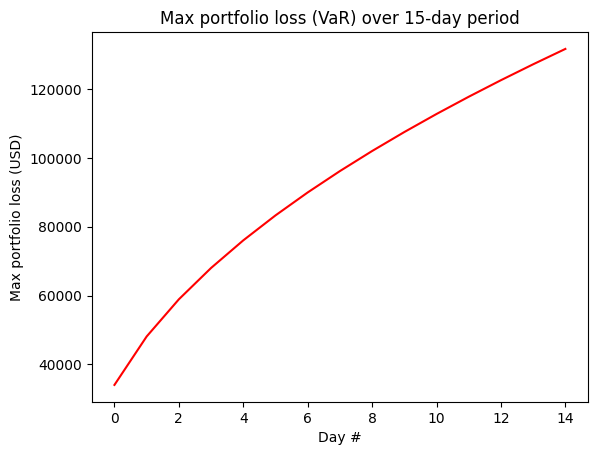

In [ ]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")


**ATTEMPT3**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def read_price_data(stock_symbol, start_date, end_date):
    """Read daily price data using Pandas Datareader"""
    stock_data = web.DataReader(stock_symbol, "yahoo", start_date, end_date) # Read stock data
    prices = stock_data.loc[:, "Adj Close"] # Store adjusted close prices
    prices = prices.fillna(method="ffill") # Forward fill missing data points

    return prices

In [ ]:
def generate_return_series(prices):
    """Compute daily return series for given price series"""
    returns = np.zeros(len(prices) - 1)
    for i in range(len(prices) - 1):
        day_return = (prices[i + 1] - prices[i]) / prices[i]
        returns[i] = day_return

    return returns

In [ ]:
def get_stock_data(stock_symbols, start_date, end_date):
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    return data['Adj Close']

In [ ]:
"""Set input"""
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2020, 1, 1)
symbol_list = ["AAPL", "AMZN", "META", "GOOG", "MSFT"] #,"CAT", "NKE", "DAL","XOM"

num_stocks= len(symbol_list)
stock_weights = {stock_symbol:1/num_stocks for stock_symbol in symbol_list} # Set stock weights

price_series_sp500 = get_stock_data("^GSPC", start_date, end_date) # Read price data
#price_series_sp500 = read_price_data("^GSPC", start_date, end_date) # Read price data
return_series_sp500 = generate_return_series(price_series_sp500) # Compute return data

no_business_days = len(return_series_sp500)
daily_returns = pd.DataFrame(index=symbol_list, columns=np.arange(no_business_days)) # Initialize DataFrame

[*********************100%%**********************]  1 of 1 completed


In [ ]:
"""Read price data and compute daily returns"""
for stock_symbol in symbol_list:
    price_series = get_stock_data(stock_symbol, start_date, end_date) # Read price data
    return_series = generate_return_series(price_series) # Compute return data
    daily_returns.loc[stock_symbol] = return_series # Store return series in DataFrame

daily_returns.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
AAPL,-0.099607,0.042689,-0.002226,0.019063,0.016982,0.003196,-0.009818,-0.015037,0.020467,0.012217,...,0.001965,-0.002389,0.001001,-0.002071,0.016318,0.000951,0.01984,-0.000379,0.005935,0.007306
AMZN,-0.025241,0.050064,0.034353,0.016612,0.001714,-0.001928,-0.009455,-0.014233,0.035462,0.005506,...,0.012124,-0.003703,0.004624,-0.003225,0.003638,-0.002114,0.044467,0.000551,-0.012253,0.000514
META,-0.029039,0.047138,0.000725,0.032452,0.011927,-0.000208,-0.002774,0.011057,0.024486,-0.009466,...,0.002375,0.020717,0.01758,0.001165,-0.000582,-0.005141,0.013017,0.001492,-0.017732,0.004109
GOOG,-0.028484,0.053786,-0.002167,0.007385,-0.001505,-0.004029,-0.012277,-0.011824,0.031071,0.003546,...,-0.004445,-0.001845,0.002529,-0.004757,-0.000556,-0.003914,0.012534,-0.006255,-0.01165,0.000659
MSFT,-0.036788,0.046509,0.001275,0.007251,0.014299,-0.006426,-0.007722,-0.007296,0.029005,0.003524,...,-0.005401,-0.002069,0.008681,0.010918,0.0,-0.000191,0.008197,0.001828,-0.008619,0.000698


In [ ]:
covariance_matrix = pd.DataFrame(index=symbol_list, columns=symbol_list)
correlation_matrix = pd.DataFrame(index=symbol_list, columns=symbol_list)

"""Compute all covariances and correlation coefficients"""
for stock1_symbol in symbol_list:
    for stock2_symbol in symbol_list:
        # Retrieve return series as arrays
        stock1_returns = daily_returns.loc[stock1_symbol].values.astype(float)
        stock2_returns = daily_returns.loc[stock2_symbol].values.astype(float)

        # Compute covariance
        cov = np.cov(stock1_returns, stock2_returns)[0][1]

        # Add covariance to matrix
        covariance_matrix.loc[stock1_symbol, stock2_symbol] = cov

        # Compute correlation
        corr = np.corrcoef(stock1_returns, stock2_returns)[0][1]

        # Add correlation to matrix
        correlation_matrix.loc[stock1_symbol, stock2_symbol] = corr

# Round correlation coefficients
correlation_matrix = correlation_matrix.astype(float).round(5)

correlation_matrix

,AAPL,AMZN,META,GOOG,MSFT
AAPL,1.00000,0.59289,0.47580,0.55834,0.62190
AMZN,0.59289,1.00000,0.61667,0.60968,0.72312
META,0.47580,0.61667,1.00000,0.56514,0.53147
GOOG,0.55834,0.60968,0.56514,1.00000,0.62918
MSFT,0.62190,0.72312,0.53147,0.62918,1.00000


Plot heatmap correlation matrix

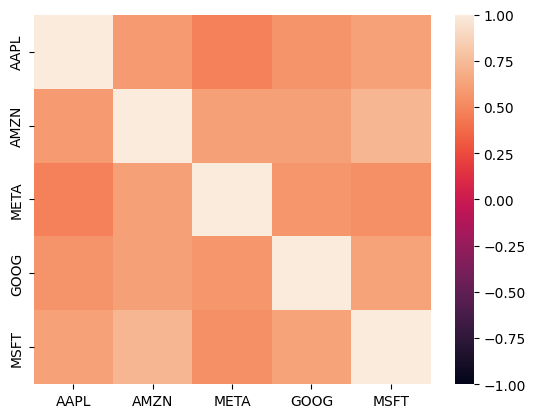

In [ ]:
ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1)

Compute portfolio variance

In [ ]:
portfolio_mean = 0
portfolio_variance = 0

"""Compute mean portfolio return"""
for stock_symbol in symbol_list:

    # Retrieve return series as arrays
    stock_returns = daily_returns.loc[stock_symbol].values.astype(float)

    weight_stock = stock_weights.get(stock_symbol)

    mean_return = stock_returns.mean()
    portfolio_mean += mean_return *weight_stock

"""Compute variance portfolio return"""
for stock1_symbol in symbol_list:
    for stock2_symbol in symbol_list:
        weight_stock1 = stock_weights.get(stock1_symbol)
        weight_stock2 = stock_weights.get(stock2_symbol)
        covariance= covariance_matrix.loc[stock1_symbol,stock2_symbol]
        portfolio_variance += weight_stock1*weight_stock2*covariance

# Compute annualized mean and volatility portfolio
ann_portfolio_mean = portfolio_mean*252
ann_portfolio_volatility = np.sqrt(252)*np.sqrt(portfolio_variance)

print('Annualized mean return:',"{0:.2%}".format(ann_portfolio_mean))
print('Annualized portfolio volatility:',"{0:.2%}".format(ann_portfolio_volatility))

Annualized mean return: 41.86%
Annualized portfolio volatility: 19.76%


Compute mean and variance of S&P 500

In [ ]:
# Compute annualized mean and volatility S&P 500
ann_sp500_mean = np.mean(return_series_sp500) *252
ann_SP500_volatility = np.sqrt(252) * np.std(return_series_sp500)

print('Annualized SP500 return:',"{0:.2%}".format(ann_sp500_mean))
print('Annualized SP500 volatility:',"{0:.2%}".format(ann_SP500_volatility))

Annualized SP500 return: 26.14%
Annualized SP500 volatility: 12.47%


**WORKING**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

def read_price_data(stock_symbol, start_date, end_date):
    """Read daily price data using Pandas Datareader"""
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    #stock_data = web.DataReader(stock_symbol, "yahoo", start_date, end_date) # Read stock data
    prices = stock_data.loc[:, "Adj Close"] # Store adjusted close prices
    prices = prices.fillna(method="ffill") # Forward fill missing data points

    return prices

def generate_return_series(prices):
    """Compute daily return series for given price series"""
    returns = np.zeros(len(prices) - 1)
    for i in range(len(prices) - 1):
        day_return = (prices[i + 1] - prices[i]) / prices[i]
        returns[i] = day_return

    return returns

def get_stock_data(stock_symbols, start_date, end_date):
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    return data['Adj Close']

In [ ]:
"""Set input"""
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
symbol_list = ["^NSEI", "^NSEBANK", "SETFGOLD.NS", "NIFTY_FIN_SERVICE.NS", "0P00005WSQ.BO"] #,"CAT", "NKE", "DAL","XOM"



#*******************************TO BE REMOVED

num_stocks= len(symbol_list)
stock_weights = {stock_symbol:1/num_stocks for stock_symbol in symbol_list} # Set stock weights

price_series_nifty = get_stock_data("^NSEI", start_date, end_date) # Read price data
return_series_nifty = generate_return_series(price_series_nifty) # Compute return data

no_business_days = len(return_series_nifty)
daily_returns = pd.DataFrame(index=symbol_list, columns=np.arange(no_business_days)) # Initialize DataFrame



#********************************************************************


#_______NEW INSERT

# Step 4: Download data for each stock symbol individually
for symbol in symbol_list:
    # Download historical data
    #data = yf.download(symbol, start=start_date, end=end_date)
    price_series = read_price_data(symbol, start_date, end_date)
    data = generate_return_series(price_series)

    # Extract 'Date' and 'Adj Close' columns
    data = data[['Adj Close']]

    # Handle missing data (interpolation)
    data = data.interpolate()

    # Rename the 'Adj Close' column to the symbol name
    data.rename(columns={'Adj Close': symbol}, inplace=True)

    # Merge data with final_df based on 'Date' index
    final_df = pd.concat([final_df, data], axis=1)

# Step 5: Find the symbol with the maximum number of rows
max_rows_symbol = final_df.count().idxmax()

# Step 6: Create a new DataFrame with dates from the symbol with the most data
new_df = pd.DataFrame(final_df[max_rows_symbol])

# Step 7: Add data for other symbols to the new DataFrame (alternative logic)
for symbol in stock_symbols:
    if symbol != max_rows_symbol:
        symbol_data = final_df[symbol].rename(f'Adj Close_{symbol}')
        new_df = new_df.join(symbol_data, how='left')  # Use left join to align data on the 'Date' index

# Handle missing data in the new DataFrame (interpolation for each symbol's column)
new_df = new_df.interpolate()

#_________END OF NEW INSERT





"""Read price data and compute daily returns"""
for stock_symbol in symbol_list:
    price_series = read_price_data(stock_symbol, start_date, end_date) # Read price data
    return_series = generate_return_series(price_series) # Compute return data
    daily_returns.loc[stock_symbol] = return_series # Store return series in DataFrame


daily_returns.head()

covariance_matrix = pd.DataFrame(index=symbol_list, columns=symbol_list)
correlation_matrix = pd.DataFrame(index=symbol_list, columns=symbol_list)

"""Compute all covariances and correlation coefficients"""
for stock1_symbol in symbol_list:
    for stock2_symbol in symbol_list:
        # Retrieve return series as arrays
        stock1_returns = daily_returns.loc[stock1_symbol].values.astype(float)
        stock2_returns = daily_returns.loc[stock2_symbol].values.astype(float)

        # Compute covariance
        cov = np.cov(stock1_returns, stock2_returns)[0][1]

        # Add covariance to matrix
        covariance_matrix.loc[stock1_symbol, stock2_symbol] = cov

        # Compute correlation
        corr = np.corrcoef(stock1_returns, stock2_returns)[0][1]

        # Add correlation to matrix
        correlation_matrix.loc[stock1_symbol, stock2_symbol] = corr

# Round correlation coefficients
correlation_matrix = correlation_matrix.astype(float).round(5)

#COMPUTE PORTFOLIO VARIANCE
portfolio_mean = 0
portfolio_variance = 0

"""Compute mean portfolio return"""
for stock_symbol in symbol_list:

    # Retrieve return series as arrays
    stock_returns = daily_returns.loc[stock_symbol].values.astype(float)

    weight_stock = stock_weights.get(stock_symbol)

    mean_return = stock_returns.mean()
    portfolio_mean += mean_return *weight_stock

"""Compute variance portfolio return"""
for stock1_symbol in symbol_list:
    for stock2_symbol in symbol_list:
        weight_stock1 = stock_weights.get(stock1_symbol)
        weight_stock2 = stock_weights.get(stock2_symbol)
        covariance= covariance_matrix.loc[stock1_symbol,stock2_symbol]
        portfolio_variance += weight_stock1*weight_stock2*covariance

# Compute annualized mean and volatility portfolio
ann_portfolio_mean = portfolio_mean*252
ann_portfolio_volatility = np.sqrt(252)*np.sqrt(portfolio_variance)

print('Annualized mean return:',"{0:.2%}".format(ann_portfolio_mean))
print('Annualized portfolio volatility:',"{0:.2%}".format(ann_portfolio_volatility))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ValueError: ignored

In [ ]:
len(return_series)

493

In [ ]:
len(return_series_nifty)

495

In [ ]:
daily_returns

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
^NSEI,0.008161,0.004712,-0.00375,-0.000629,0.014847,0.009584,0.005433,0.000096,0.002111,-0.011092,...,0.00829,-0.001908,-0.010128,-0.003943,-0.017683,0.01167,0.006534,-0.000541,0.00378,-0.004711
^NSEBANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SETFGOLD.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NIFTY_FIN_SERVICE.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0P00005WSQ.BO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import yfinance as yf
import pandas as pd

# Step 2: Define a list of stock symbols
stock_symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Step 3: Initialize an empty DataFrame
final_df = pd.DataFrame()

# Step 4: Download data for each stock symbol individually
for symbol in stock_symbols:
    # Download historical data
    data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Extract 'Date' and 'Adj Close' columns
    data = data[['Adj Close']]

    # Handle missing data (interpolation)
    data = data.interpolate()

    # Rename the 'Adj Close' column to the symbol name
    data.rename(columns={'Adj Close': symbol}, inplace=True)

    # Merge data with final_df based on 'Date' index
    final_df = pd.concat([final_df, data], axis=1)

# Step 5: Find the symbol with the maximum number of rows
max_rows_symbol = final_df.count().idxmax()

# Step 6: Create a new DataFrame with dates from the symbol with the most data
new_df = pd.DataFrame(final_df[max_rows_symbol])

# Step 7: Add data for other symbols to the new DataFrame (alternative logic)
for symbol in stock_symbols:
    if symbol != max_rows_symbol:
        symbol_data = final_df[symbol].rename(f'Adj Close_{symbol}')
        new_df = new_df.join(symbol_data, how='left')  # Use left join to align data on the 'Date' index

# Handle missing data in the new DataFrame (interpolation for each symbol's column)
new_df = new_df.interpolate()

# Organize the final output
print(new_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AAPL  Adj Close_GOOGL  Adj Close_MSFT  Adj Close_AMZN
Date                                                                   
2022-01-03  180.190979       144.991501      329.394836      170.404495
2022-01-04  177.904053       144.399506      323.746674      167.522003
2022-01-05  173.171844       137.774994      311.318726      164.356995
2022-01-06  170.281006       137.747498      308.858734      163.253998
2022-01-07  170.449310       137.016998      309.016205      162.554001
...                ...              ...             ...             ...
2022-12-23  131.299820        89.230003      237.112076       85.250000
2022-12-27  129.477585        87.389999      235.354095       83.040001
2022

In [ ]:
def read_price_data(stock_symbol, start_date, end_date):
    """Read daily price data using Pandas Datareader"""
    #stock_data = web.DataReader(stock_symbol, "yahoo", start_date, end_date) # Read stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    prices = stock_data.loc[:, "Adj Close"] # Store adjusted close prices
    prices = prices.fillna(method="ffill") # Forward fill missing data points

    return prices

In [ ]:
import yfinance as yf
import pandas as pd

# Step 2: Define a list of stock symbols
stock_symbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Step 3: Initialize an empty DataFrame
final_df = pd.DataFrame()

# Step 4: Download data for each stock symbol individually
for symbol in stock_symbols:
    # Download historical data
    data = yf.download(symbol, start='2022-01-01', end='2022-12-31')

    # Extract 'Date' and 'Adj Close' columns
    data = data[['Adj Close']]

    # Handle missing data (interpolation)
    data = data.interpolate()

    # Rename the 'Adj Close' column to the symbol name
    data.rename(columns={'Adj Close': symbol}, inplace=True)

    # Merge data with final_df based on 'Date' index
    final_df = pd.concat([final_df, data], axis=1)

# Step 5: Find the symbol with the maximum number of rows
max_rows_symbol = final_df.count().idxmax()

# Step 6: Create a new DataFrame with dates from the symbol with the most data
new_df = pd.DataFrame(final_df[max_rows_symbol])

# Step 7: Add data for other symbols to the new DataFrame (alternative logic)
for symbol in stock_symbols:
    if symbol != max_rows_symbol:
        symbol_data = final_df[symbol].rename(f'Adj Close_{symbol}')
        new_df = new_df.join(symbol_data, how='left')  # Use left join to align data on the 'Date' index

# Handle missing data in the new DataFrame (interpolation for each symbol's column)
new_df = new_df.interpolate()


# Organize the final output
print(new_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AAPL  Adj Close_GOOGL  Adj Close_MSFT  Adj Close_AMZN
Date                                                                   
2022-01-03  180.190979       144.991501      329.394867      170.404495
2022-01-04  177.904053       144.399506      323.746674      167.522003
2022-01-05  173.171844       137.774994      311.318695      164.356995
2022-01-06  170.281021       137.747498      308.858734      163.253998
2022-01-07  170.449310       137.016998      309.016174      162.554001
...                ...              ...             ...             ...
2022-12-23  131.299820        89.230003      237.112091       85.250000
2022-12-27  129.477585        87.389999      235.354095       83.040001
2022